# Data Scientist Professional Practical Exam Submission

## Introduction

We were recently contacted by the product team to assist them in predicting which recipes would be popular based on past results. The product team wants to display popular recipes to drive traffic to our website. We received a data file from the product team containing past receipies that were featured on the home page of our website. The data contains 947 row and eight fields including: one ID column, one target column, and six which can be used to make predictions. The product team was hoping we could build a model that could achieve an 80% accuracy on predicting whether a new recipe will be popular (driving traffic to the website).

## Importing Data

In [78]:
#importing commonly used analysis and visualization packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
#reading data
df = pd.read_csv("recipe_site_traffic_2212.csv", index_col = "recipe")
print("Recipe Site Traffic Loaded")

Recipe Site Traffic Loaded


In [80]:
#overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947 entries, 1 to 947
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   calories      895 non-null    float64
 1   carbohydrate  895 non-null    float64
 2   sugar         895 non-null    float64
 3   protein       895 non-null    float64
 4   category      947 non-null    object 
 5   servings      947 non-null    object 
 6   high_traffic  574 non-null    object 
dtypes: float64(4), object(3)
memory usage: 59.2+ KB


In [81]:
df.index.nunique()

947

We imported the recipe site traffic file into a pandas dataframe. We set the "recipe" field as the index as it is a unique ID column. The data set has 7 additional columns as expected. As we not believe the recipe ID number holds any significance, we will withhold it from any models.

## Data Validation and Cleaning

### High Traffic

The high traffic column is the target to predict with our model. The original column is filled with a single text value "High" and null values. While this isn't unexpected, we can replace the target column with 1s and 0s to indicate whether the condition is fulfilled to assist in our modeling.

In [82]:
df.high_traffic.value_counts()

High    574
Name: high_traffic, dtype: int64

In [83]:
#changing the data values and type
#filling null values with 0
df.high_traffic.fillna('0', inplace = True)
#replacing "High" with 1
df.loc[df.high_traffic == 'High', 'high_traffic'] = '1'
#changing the data type of the column
df['high_traffic'] = df['high_traffic'].astype('int')
#validating we did it correctly
df.high_traffic.value_counts()

1    574
0    373
Name: high_traffic, dtype: int64

### Servings
The servings column is supposed to be the number of servings the recipe is supposed to create and is expected to be numeric. We found that a few alphabetical characters slipped into the column, but they can easily be replaced and converted to numeric.

In [84]:
df.servings.value_counts()

4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: servings, dtype: int64

In [85]:
#cleaning servings
df.loc[df.servings == '4 as a snack', 'servings'] = 4

df.loc[df.servings == '6 as a snack', 'servings'] = 6

df['servings'] = df['servings'].astype('int')

#checking our results
df.servings.value_counts()

4    391
6    198
2    183
1    175
Name: servings, dtype: int64

### Category
The category column is supposed to contain 10 specified categories: 'Lunch/Snacks', 'Beverages', 'Potato', 'Vegetable', 'Meat', 'Chicken, 'Pork', 'Dessert', 'Breakfast', 'One Dish Meal'. There was one additional category "Chicken breast" which can be reassigned to 'Chicken' category.

In [86]:
df.category.value_counts()

Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: category, dtype: int64

In [87]:
#cleaning the column
df.loc[df.category == 'Chicken Breast', 'category'] = 'Chicken'
#validating we did it correctly
df.category.value_counts()

Chicken          172
Breakfast        106
Beverages         92
Lunch/Snacks      89
Potato            88
Pork              84
Vegetable         83
Dessert           83
Meat              79
One Dish Meal     71
Name: category, dtype: int64

### Calories, Carbohydrates, Sugar, Protein

These columns are interrelated and all contain the same number of missing values in the same rows. Because the data is all missing from the same rows, they cannot reasonably be imputed using these other columns. Therefore, it makes the most sense to throw these rows out of the analysis. Unfortunately, this means throwing out ~5.5% of our data. 

We also looked at the extreme values in the columns to look for errors in the data. The extreme values did indicate that our data did have incorrect values. Incorrect in the sense that the calories, carbs, sugar and protein values do not match the actual content of the food. However, we checked a few of the extreme values to make sure the data accurately represents what is listed in the website; therefore,  while not ideal, these columns can still be used for analysis.

In [88]:
df[['calories', 'carbohydrate', 'sugar', 'protein']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947 entries, 1 to 947
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   calories      895 non-null    float64
 1   carbohydrate  895 non-null    float64
 2   sugar         895 non-null    float64
 3   protein       895 non-null    float64
dtypes: float64(4)
memory usage: 69.3 KB


In [89]:
#checking to make sure nulls are all in the same rows
df[['calories', 'carbohydrate', 'sugar', 'protein']].loc[\
                                                         df.calories.isna() & df.carbohydrate.isna() & df.sugar.isna() &                                                                     df.protein.isna(), ['calories', 'carbohydrate', 'sugar', 'protein']]

,calories,carbohydrate,sugar,protein
recipe,,,,
1,NaN,NaN,NaN,NaN
24,NaN,NaN,NaN,NaN
49,NaN,NaN,NaN,NaN
83,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN
117,NaN,NaN,NaN,NaN
122,NaN,NaN,NaN,NaN
137,NaN,NaN,NaN,NaN
150,NaN,NaN,NaN,NaN


In [90]:
#just to be safe we made sure to only drop all nulls in the proper subset
df.dropna(how='all', subset = ['calories', 'carbohydrate', 'sugar', 'protein'], inplace = True)
#verifying nulls dropped correctly
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 2 to 947
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   calories      895 non-null    float64
 1   carbohydrate  895 non-null    float64
 2   sugar         895 non-null    float64
 3   protein       895 non-null    float64
 4   category      895 non-null    object 
 5   servings      895 non-null    int64  
 6   high_traffic  895 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 55.9+ KB


In [91]:
#examing distribution of calories
df.calories.describe()

count     895.000000
mean      435.939196
std       453.020997
min         0.140000
25%       110.430000
50%       288.550000
75%       597.650000
max      3633.160000
Name: calories, dtype: float64

In [92]:
#looking at extreme values
df[(df.calories < 1) | (df.calories > 2500)]

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
recipe,,,,,,,
72,2508.47,18.11,10.60,84.23,Chicken,4,0
125,2906.01,3.52,1.89,179.22,Pork,6,1
227,2703.12,6.40,2.17,28.20,Pork,6,1
229,0.14,18.12,11.15,87.34,Lunch/Snacks,2,1
277,0.76,1.90,3.76,0.05,Vegetable,2,1
501,0.30,5.19,0.96,1.51,Beverages,4,0
653,0.54,30.59,10.45,0.36,Beverages,6,1
655,0.59,18.82,58.00,16.44,Dessert,2,1
670,0.80,12.26,1.33,6.21,Chicken,6,0


**Calories in the above table do not look correct as they do not align with the macronutrient (carbohydrate, protein) information provided.**

In [93]:
#examing distribution of carbs
df.carbohydrate.describe()

count    895.000000
mean      35.069676
std       43.949032
min        0.030000
25%        8.375000
50%       21.480000
75%       44.965000
max      530.420000
Name: carbohydrate, dtype: float64

In [94]:
#looking at extreme values
df[(df.carbohydrate < 0.5) | (df.carbohydrate > 300)]

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
recipe,,,,,,,
18,1695.82,0.10,0.39,33.17,Meat,1,1
157,81.01,0.35,1.27,1.19,Beverages,4,0
167,25.83,0.13,2.24,28.60,Chicken,6,0
211,1165.14,0.14,4.36,9.64,Potato,1,1
350,94.27,383.06,5.98,39.61,Potato,1,1
451,182.76,530.42,5.80,5.01,Potato,4,1
461,1179.50,0.31,13.70,1.42,One Dish Meal,4,1
537,879.61,0.03,8.34,7.83,Chicken,4,1
551,927.15,0.05,1.73,12.29,Potato,4,1


**Carbohydrate in the above table does not look correct as it can be lower than sugar which is impossible as sugar is in the subset of carbohydrates. It can also be higher than calories in the table which is also highly unlikely, as a typical carbohydrate has ~4 calories per gram.**

In [95]:
#examing distribution of sugar
df.sugar.describe()

count    895.000000
mean       9.046547
std       14.679176
min        0.010000
25%        1.690000
50%        4.550000
75%        9.800000
max      148.750000
Name: sugar, dtype: float64

In [96]:
#looking at extreme values
df[(df.sugar < 0.1) | (df.sugar > 120)]

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
recipe,,,,,,,
50,1724.25,45.52,0.07,49.37,Breakfast,1,1
78,65.52,2.67,0.07,0.51,Dessert,2,0
291,239.90,51.13,131.39,3.38,Dessert,2,1
528,10.66,2.32,0.08,73.42,Pork,6,1
541,60.62,140.98,148.75,5.53,Dessert,1,0
633,105.95,55.80,0.07,7.55,Vegetable,2,1
710,322.89,14.86,0.02,6.84,Lunch/Snacks,6,1
805,446.58,0.44,0.05,37.28,Chicken,4,0
848,88.17,49.37,0.01,0.40,Beverages,6,0


**As mentioned above, sugar can exceed carbohydrate in the data which isn't correct.**

In [97]:
#examing distribution of protein
df.protein.describe()

count    895.000000
mean      24.149296
std       36.369739
min        0.000000
25%        3.195000
50%       10.800000
75%       30.200000
max      363.360000
Name: protein, dtype: float64

In [98]:
#looking at extreme values
df[(df.calories < df.protein)]

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
recipe,,,,,,,
21,9.26,17.44,8.16,10.81,Potato,6,1
30,164.76,33.58,17.87,220.14,One Dish Meal,2,1
71,100.00,95.89,10.20,114.60,Lunch/Snacks,4,0
124,38.92,12.90,11.32,69.53,Chicken,1,0
138,24.05,59.63,0.31,142.03,Chicken,4,1
140,13.62,92.02,0.89,44.92,One Dish Meal,1,1
167,25.83,0.13,2.24,28.60,Chicken,6,0
175,16.58,5.66,14.41,19.94,Breakfast,6,1
200,52.32,2.84,2.96,88.21,Meat,4,1


**Protein regularly exceeds the calorie count which is not possible in the actual food.**

## Feature Engineering
In this section, we attempt to create useful new features by exploring relationships between the variables. We created new columns for percentages of totals (i.e. cals from sugar over total calories)

In [99]:
#creating column for percentage of calories from sugar and protein
df['sugar_pct'] = df.sugar*4 / df.calories

df['protein_pct'] = df.protein * 4 / df.calories

#percent of carbs that are sugar
df['sugar_pct_carbs'] = df.sugar / df.carbohydrate


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 2 to 947
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   calories         895 non-null    float64
 1   carbohydrate     895 non-null    float64
 2   sugar            895 non-null    float64
 3   protein          895 non-null    float64
 4   category         895 non-null    object 
 5   servings         895 non-null    int64  
 6   high_traffic     895 non-null    int64  
 7   sugar_pct        895 non-null    float64
 8   protein_pct      895 non-null    float64
 9   sugar_pct_carbs  895 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 76.9+ KB


## Exploratory Analysis

### Relationships Between Numeric Variables

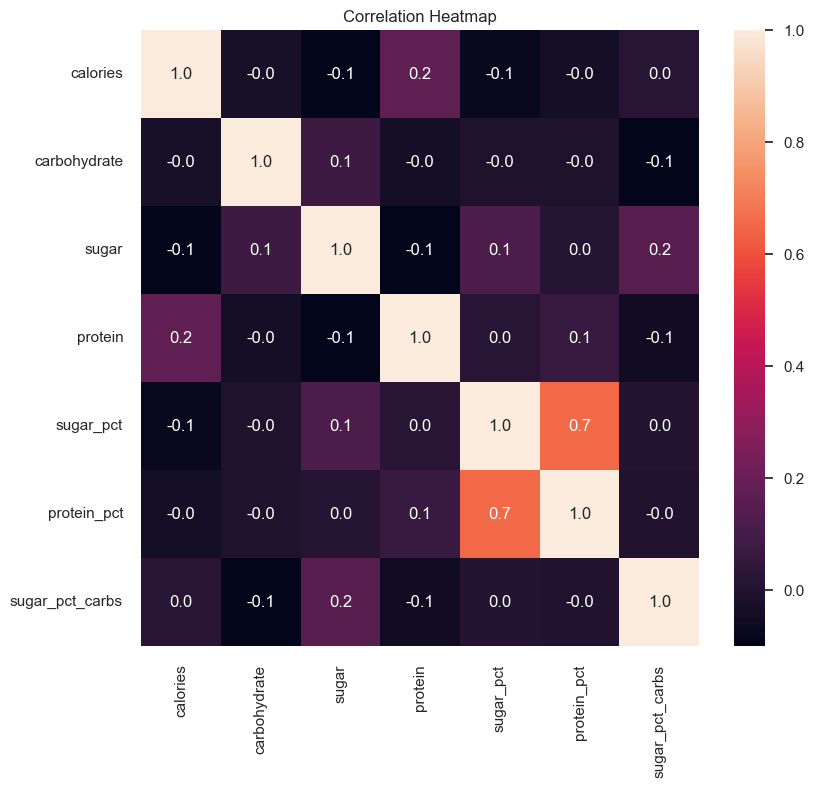

In [101]:
num = df[['calories', 'carbohydrate', 'sugar', 'protein', 'sugar_pct', 'protein_pct', 'sugar_pct_carbs']]
sns.set(rc={'figure.figsize':(9, 8)})
sns.heatmap(num.corr(), annot=True, fmt=".1f").set(title='Correlation Heatmap');

There is surprisingly no relationship between calories and any of the following: carbohydrates, sugar, and protein. These should be related indicating problems with the data representing reality. Surprisingly, there is a fairly strong relationship between sugar percentage and protein percentage which doesn't make a lot of sense. However, it isn't strong enough for us to consider dropping one of these from our models.

### Distributions for Key Numeric Variables

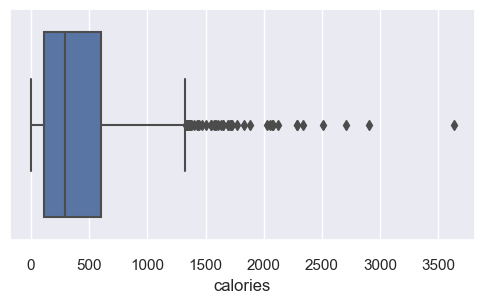

In [102]:
sns.set(rc={'figure.figsize':(6, 3)})
sns.boxplot(x = 'calories', data = df)
plt.show()

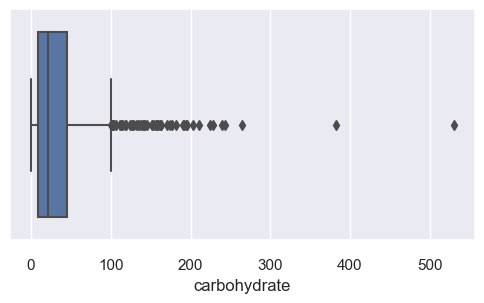

In [103]:
sns.set(rc={'figure.figsize':(6, 3)})
sns.boxplot(x = 'carbohydrate', data = df)
plt.show()

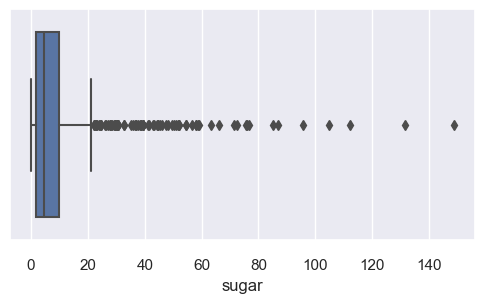

In [104]:
sns.set(rc={'figure.figsize':(6, 3)})
sns.boxplot(x = 'sugar', data = df)
plt.show()

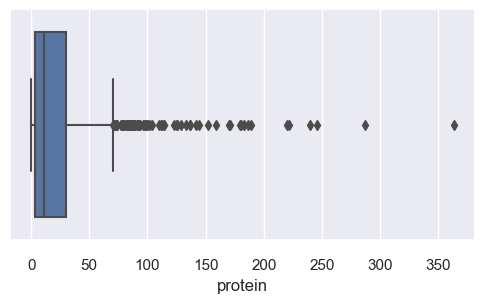

In [105]:
sns.set(rc={'figure.figsize':(6, 3)})
sns.boxplot(x = 'protein', data = df)
plt.show()

All four box plots look quite similar. They have a far right skew. We would likely expect these values to be much closer to a normal distribution, indicating there are likely quite a few errors representing the actual content of the food, especially at the extremes.

### Examining Categories vs Target Variable

In [106]:
df.high_traffic.mean()

0.5977653631284916

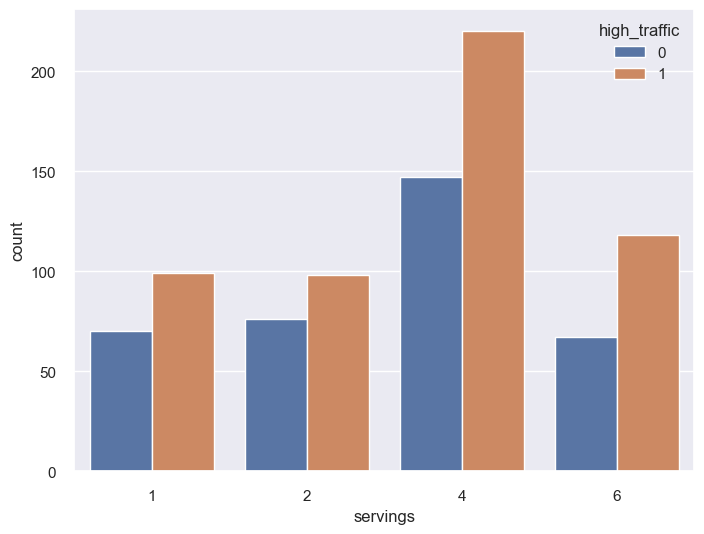

In [107]:
sns.set(rc={'figure.figsize':(8, 6)})
sns.countplot(df, x="servings", hue="high_traffic")
plt.show()

The above chart shows that a serving size of 4 is by far the most common, but on the surface, servings don't appear to have a major impact on the percent that generate high traffic.

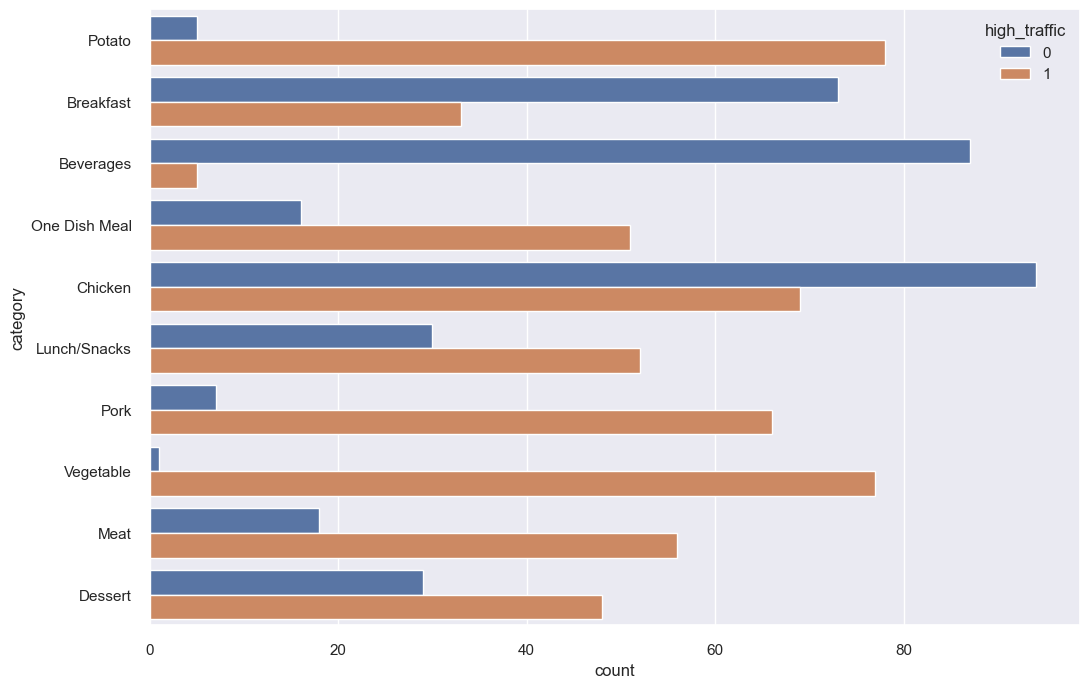

In [108]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.countplot(df, y="category", hue="high_traffic")
plt.show()

There is a high variability between the success of categories which means it should be very predictive. Chicken is also far and away the most common type of recipe.

## Data Preprocessing


### Preprocessing for Logistic Regression

In [109]:
#importing potential packages
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelBinarizer, LabelEncoder, OneHotEncoder


from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV

In [110]:
#encoding seting up encoding and scaling pipeline
df2 = df.loc[:, df.columns != 'high_traffic']

numeric_columns=['calories', 'carbohydrate', 'sugar', 'protein', 'sugar_pct', 'protein_pct', 'sugar_pct_carbs']
categorical_columns=['category', 'servings']

#using one hot encoding for categorical variables
pipeline=ColumnTransformer([
    ('num',StandardScaler(),numeric_columns),
    ('cat',OneHotEncoder(),categorical_columns)])

In [111]:
X = pipeline.fit_transform(df2)
feat_names = pipeline.get_feature_names_out(df2.columns)

In [112]:
#splitting data for training and test
X_train, X_test, y_train, y_test = train_test_split(X, df['high_traffic'], test_size=.15, random_state=783)

### Preprocessing for Light GBM
Light GBM is a tree based model.

In [113]:
import lightgbm as lgb
#setting up new dataframe because Light GBM can use data processed more simply
df3 = df[numeric_columns]
label_encoder = LabelEncoder()
df3['category_cat'] = label_encoder.fit_transform(df.category)
df3['servings_cat'] = label_encoder.fit_transform(df.servings)

df3.head()

,calories,carbohydrate,sugar,protein,sugar_pct,protein_pct,sugar_pct_carbs,category_cat,servings_cat
recipe,,,,,,,,,
2,35.48,38.56,0.66,0.92,0.074408,0.103720,0.017116,8,2
3,914.28,42.68,3.09,2.88,0.013519,0.012600,0.072399,1,0
4,97.03,30.56,38.63,0.02,1.592497,0.000824,1.264071,0,2
5,27.05,1.85,0.80,0.53,0.118299,0.078373,0.432432,0,2
6,691.15,3.46,1.65,53.93,0.009549,0.312117,0.476879,6,1


In [114]:
#splitting data for train and test
train_features, test_features, train_labels, test_labels = train_test_split(df3, df['high_traffic'], test_size=.15, random_state=783)

In [115]:
train_set_lgb = lgb.Dataset(data = train_features, label = train_labels, categorical_feature = ['category_cat', 'servings_cat'], free_raw_data = False)
test_set_lgb = lgb.Dataset(data = test_features, label = test_labels, categorical_feature = ['category_cat', 'servings_cat'], free_raw_data = False)

## Model Development

This is a binary classification problem. Logistic regression and various tree classifers are very appropriate for this type of problem.

### Model 1: Logistic Regression

In [116]:
#setting up log reg cv
log_reg_cv = LogisticRegressionCV(Cs=np.logspace(-3,3,7), penalty='l2', solver='lbfgs', cv = 3, 
                          n_jobs=-1, random_state = 50)

In [117]:
#fitting the models
logit_model = log_reg_cv.fit(X_train, y_train)

In [118]:
logit_model.scores_

{1: array([[0.59055118, 0.61811024, 0.70866142, 0.72440945, 0.72047244,
         0.72047244, 0.72047244],
        [0.58893281, 0.61660079, 0.743083  , 0.7312253 , 0.73517787,
         0.73517787, 0.73517787],
        [0.58893281, 0.64822134, 0.74703557, 0.7944664 , 0.79841897,
         0.79841897, 0.79841897]])}

The best scores were near C = 10.

In [119]:
logit = LogisticRegression(solver='lbfgs', random_state=50, C=10, penalty='l2', n_jobs = -1)
logit_model = logit.fit(X_train, y_train)

In [120]:
#making predictions
logit_preds = logit_model.predict(X_test)
logit_probs = logit_model.predict_proba(X_test)[:,]

### Model 2: Light GBM

In [121]:
model = lgb.LGBMModel()
model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [122]:
lgb_baseline = lgb.LGBMClassifier()
default_params = lgb_baseline.get_params()

In [123]:
from sklearn.metrics import accuracy_score, f1_score, log_loss
lgb_baseline.fit(train_features, train_labels)
lgb_preds = lgb_baseline.predict(test_features)
lgb_acc = accuracy_score(test_labels, lgb_preds)

print('The baseline model scores {:.4f} Accuracy on the test set.'.format(lgb_acc))

The baseline model scores 0.7259 Accuracy on the test set.


In [124]:
lgb_param_grid = {
    'num_leaves': list(range(35, 61)),
    'learning_rate': list(np.linspace(0.01, 0.2, 100)),
    'min_child_samples': list(range(10, 31)),
    'reg_alpha': list(np.linspace(0.40, 0.70, 31)),
    'reg_lambda': list(np.linspace(0.30, 0.50, 21)),
    'colsample_bytree': list(np.linspace(0.55, 0.75, 21)),
    'is_unbalance' : [True]
    }

In [125]:
def objective(hyperparameters, iteration):
    """Objective function for grid and random search. Returns
       the cross validation score from a set of hyperparameters."""
    
    # Number of estimators will be found using early stopping
    if 'n_estimators' in hyperparameters.keys():
        del hyperparameters['n_estimators']
    
     # Perform n_folds cross validation
    cv_results = lgb.cv(hyperparameters, train_set_lgb, num_boost_round = 50, nfold = 3, metrics = 'l2', seed = 157)
    
    # results to retun
    score = cv_results['l2-mean'][-1]
    estimators = len(cv_results['l2-mean'])
    hyperparameters['n_estimators'] = estimators 
    
    return [score, hyperparameters, iteration]

In [126]:
import random
def random_search(param_grid, max_evals = 50):
    """Random search for hyperparameter optimization"""
    
    # Dataframe for results
    results = pd.DataFrame(columns = ['score', 'params', 'iteration'],
                                  index = list(range(max_evals)))
    
    # Keep searching until reach max evaluations
    for i in range(max_evals):
        
        # Choose random hyperparameters
        hyperparameters = {k: random.sample(v, 1)[0] for k, v in param_grid.items()}
        
        # Evaluate randomly selected hyperparameters
        eval_results = objective(hyperparameters, i)
        
        results.loc[i, :] = eval_results
    
    # Sort with best (lowest) score on top
    results.sort_values('score', ascending = True, inplace = True)
    results.reset_index(inplace = True)
    return results

In [127]:
#custom random search

random_results = random_search(lgb_param_grid, 50)

print('The best validation score was {:.5f}'.format(random_results.loc[0, 'score']))

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000114 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1792
[LightGBM] [Info] Number of data points in the train set: 506, number of used features: 9
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000101 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1792
[LightGBM] [Info] Number of data points in the train set: 507, number of used features: 9
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000099 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1792
[LightGBM] [Info] Number of data points in the train set: 507, number of used features: 9
[LightGBM] [Info] Start training from score 0.588933
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[LightGBM] [Fatal] Reducing `min_data_in_leaf` with `feature_pre_filter=true` may cause unexpected behaviour for features that were pre-filtered by the larger `min_data_in_leaf`.
You need to set `feature_pre_filter=false` to dynamically change the `min_data_in_leaf`.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.190163 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1792
[LightGBM] [Info] Number of data points in the train set: 506, number of used features: 9
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000105 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1792
[LightGBM] [Info] Number of data points in the train set: 507, number of used features: 9
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000103 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1792
[LightGBM] [Info] Number of data points in the train set: 507, number of used features: 9
[LightGBM] [Info] Start training from score 0.588933
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[LightGBM] [Fatal] Reducing `min_data_in_leaf` with `feature_pre_filter=true` may cause unexpected behaviour for features that were pre-filtered by the larger `min_data_in_leaf`.
You need to set `feature_pre_filter=false` to dynamically change the `min_data_in_leaf`.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [128]:
best_param_lgb = []

In [129]:
best_param_lgb.append(random_results.loc[0, 'params'])
for param in best_param_lgb:
    print(param)

{'num_leaves': 36, 'learning_rate': 0.03494949494949495, 'min_child_samples': 25, 'reg_alpha': 0.59, 'reg_lambda': 0.47, 'colsample_bytree': 0.63, 'is_unbalance': True, 'n_estimators': 50}


In [130]:
# Train model
lgb_model = lgb.LGBMClassifier(**random_results.loc[0, 'params'], random_state = 183)
lgb_model.fit(train_features, train_labels)

LGBMClassifier(colsample_bytree=0.63, is_unbalance=True,
               learning_rate=0.03494949494949495, min_child_samples=25,
               n_estimators=50, num_leaves=36, random_state=183, reg_alpha=0.59,
               reg_lambda=0.47)

In [131]:
#making predictions
lgb_preds = lgb_model.predict(test_features)
lgb_probs = lgb_model.predict_proba(test_features)[:,]

## Model Evaluation

### LightGBM Evaluation

In [132]:
lgb_accuracy_score = accuracy_score(test_labels, lgb_preds)
lgb_f1_value = f1_score(test_labels, lgb_preds, average ='weighted')
lgb_log_loss_value = log_loss(test_labels, lgb_probs, normalize=True)
print("Accuracy Score:     {:0.4f}".format(lgb_accuracy_score))
print("       F-score:     {:0.4f}".format(lgb_f1_value))
print("      Log Loss:     {:0.4f}".format(lgb_log_loss_value))

Accuracy Score:     0.7630
       F-score:     0.7674
      Log Loss:     0.5081


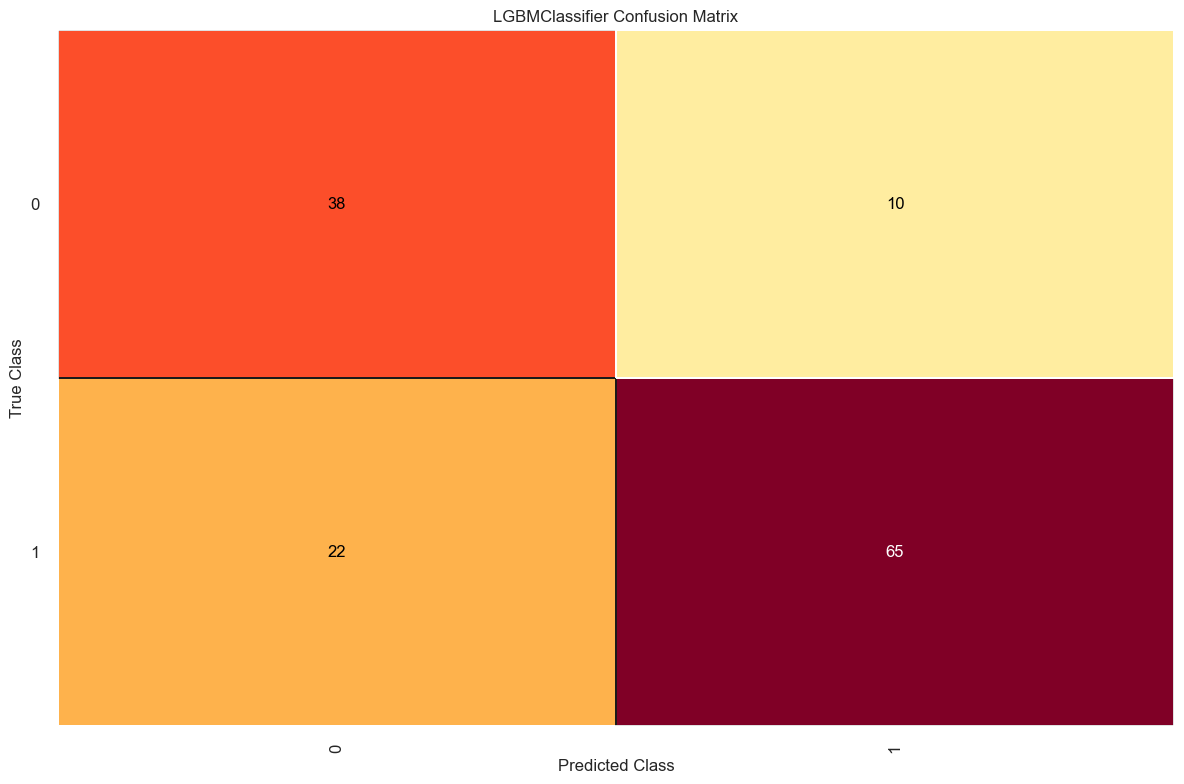

<AxesSubplot: title={'center': 'LGBMClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [133]:
from yellowbrick.classifier import ConfusionMatrix

knn_cm = ConfusionMatrix(lgb_model)

knn_cm.fit(train_features, train_labels)
knn_cm.score(test_features, test_labels)

knn_cm.show()

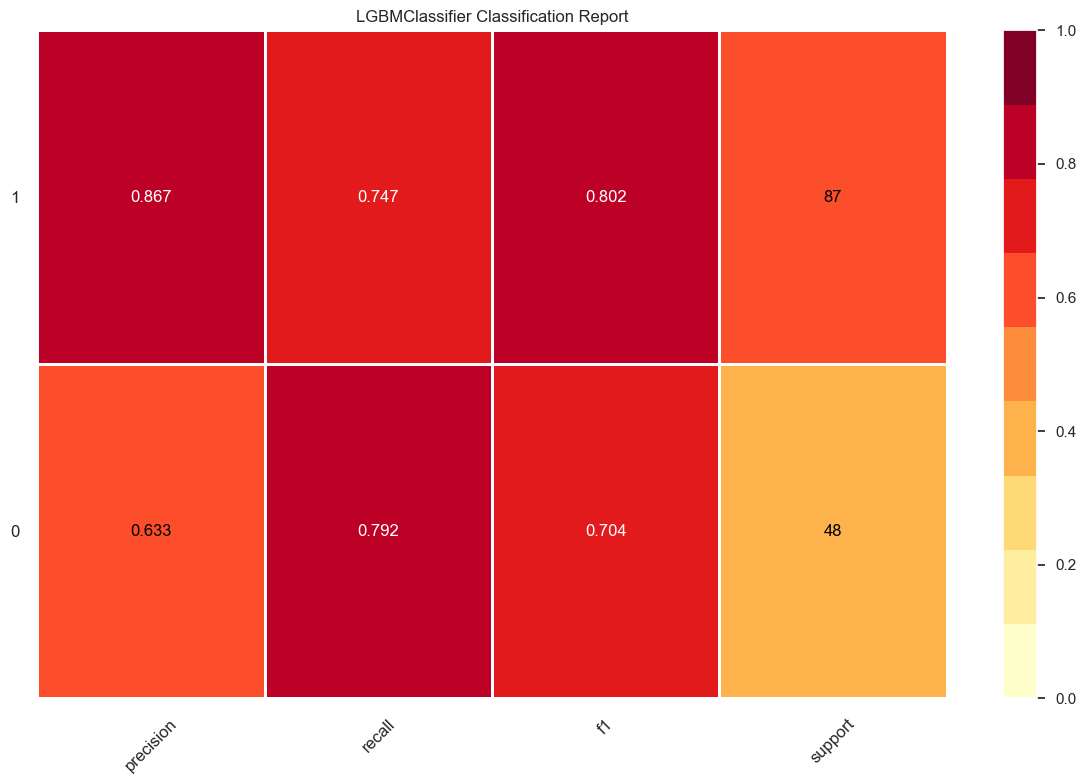

<AxesSubplot: title={'center': 'LGBMClassifier Classification Report'}>

In [134]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(lgb_model, support=True)
visualizer.fit(train_features, train_labels)        # Fit the visualizer and the model
visualizer.score(test_features, test_labels)        # Evaluate the model on the test data
visualizer.show()

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

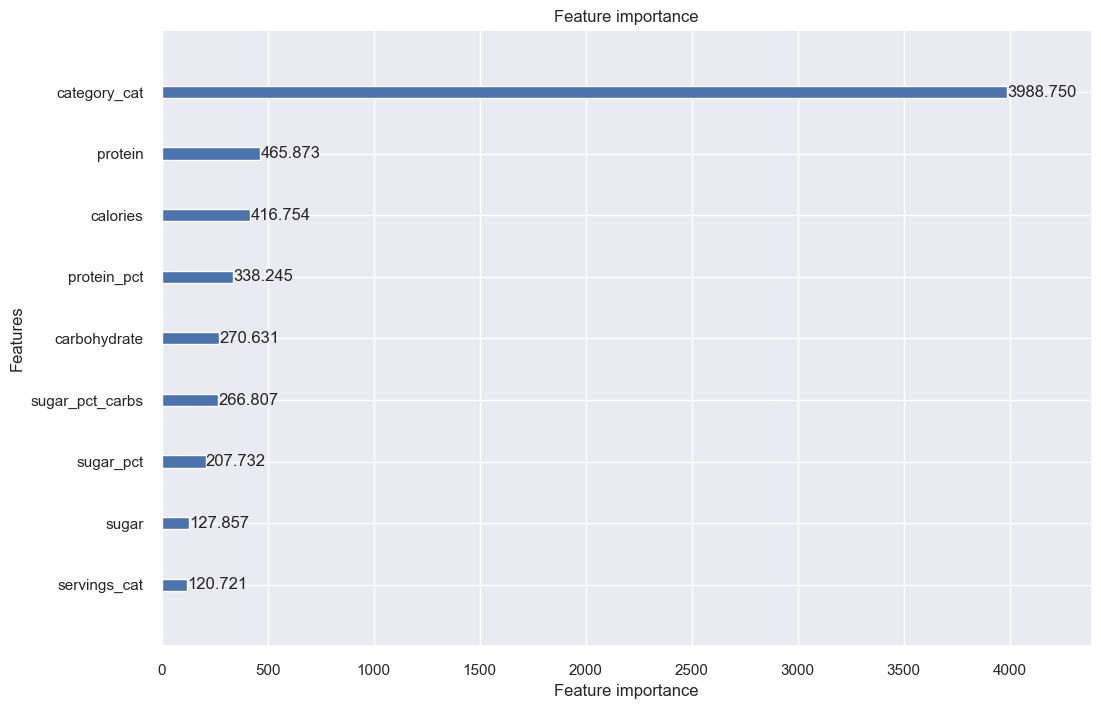

In [135]:
#displaying the most important features
lgb.plot_importance(booster = lgb_model, importance_type="gain")

Logistic Regression Evaluation

In [136]:
logit_accuracy_score = accuracy_score(y_test, logit_preds)
logit_f1_value = f1_score(y_test, logit_preds, average ='weighted')
logit_log_loss_value = log_loss(y_test, logit_probs, normalize=True)
print("Accuracy Score:     {:0.4f}".format(logit_accuracy_score))
print("       F-score:     {:0.4f}".format(logit_f1_value))
print("      Log Loss:     {:0.4f}".format(logit_log_loss_value))

Accuracy Score:     0.7704
       F-score:     0.7698
      Log Loss:     0.4437


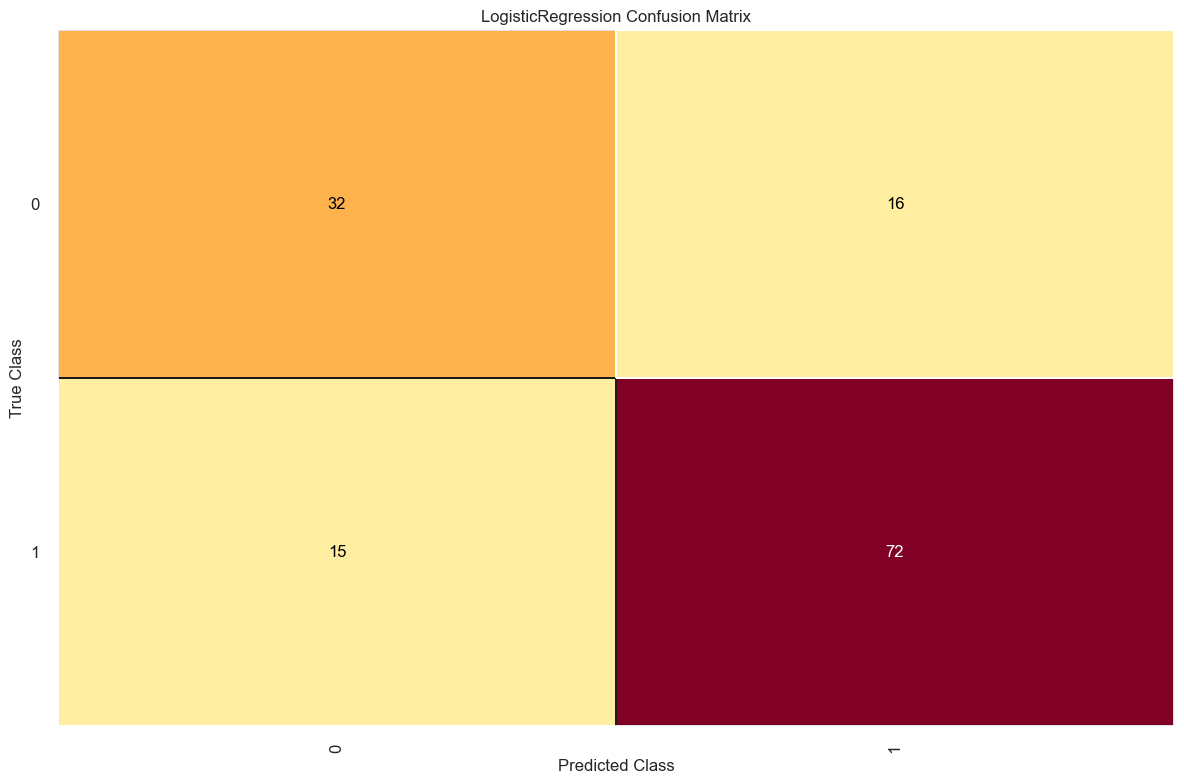

<AxesSubplot: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [137]:
knn_cm = ConfusionMatrix(logit_model)

knn_cm.fit(X_train, y_train)
knn_cm.score(X_test, y_test)

knn_cm.show()

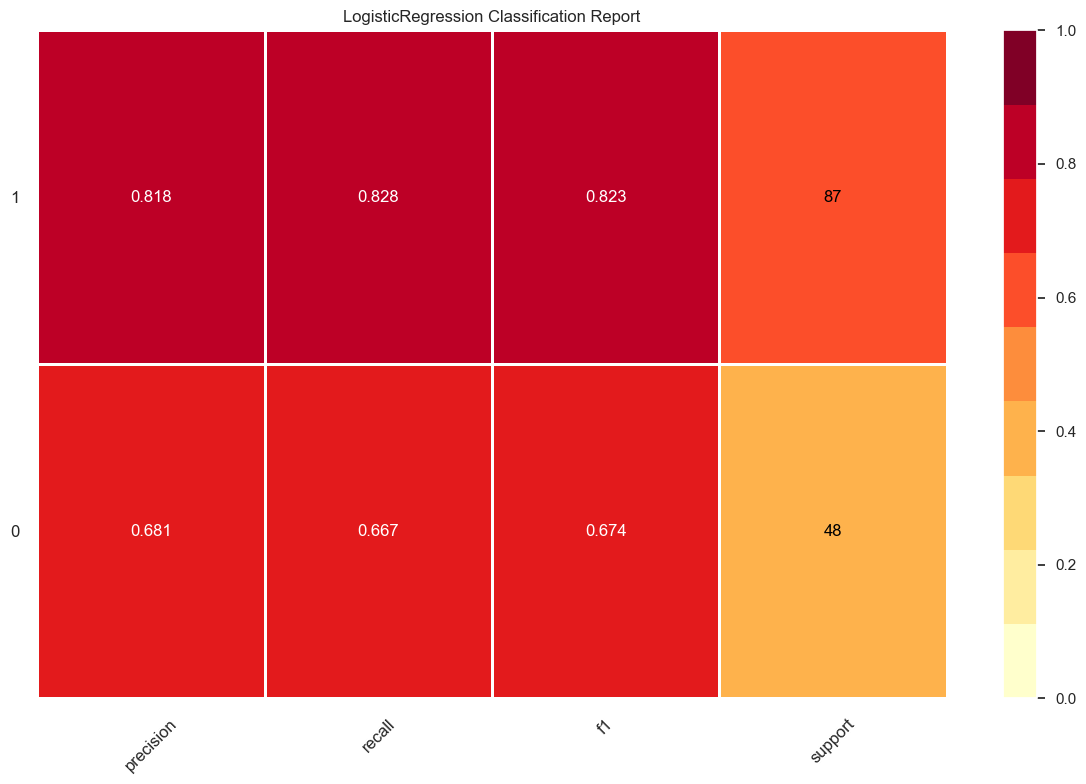

<AxesSubplot: title={'center': 'LogisticRegression Classification Report'}>

In [138]:
visualizer = ClassificationReport(logit_model, support=True)
visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

<AxesSubplot: ylabel='Feature'>

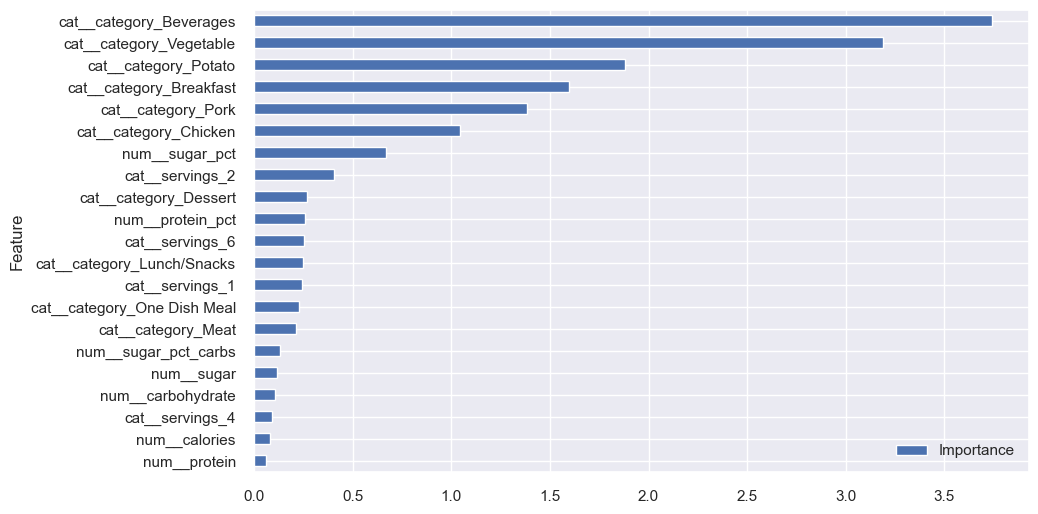

In [139]:
feature_importance = pd.DataFrame({'Feature': feat_names, 'Importance': np.abs(logit_model.coef_[0])})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

### Comparison
The models didn't fair all that differently, but the Logistic Regression model had a superior log-loss which leads us to belive it was a closer representation of reality because it was able to predict probabilities better.

Both models indicated that category column was by far the most important feature to predicting the success of a receipe.

In [140]:
#convert scores to a df
score_data = [{"accuracy":lgb_accuracy_score, "f1 value": lgb_f1_value, "log loss":lgb_log_loss_value}, {"accuracy":logit_accuracy_score, "f1 value":logit_f1_value, "log loss":logit_log_loss_value}]

score_df = pd.DataFrame(score_data, index = ['LGBM Model', 'LogReg Model'])

score_df = score_df.reset_index().melt(id_vars=["index"])
print(score_df)

          index  variable     value
0    LGBM Model  accuracy  0.762963
1  LogReg Model  accuracy  0.770370
2    LGBM Model  f1 value  0.767353
3  LogReg Model  f1 value  0.769818
4    LGBM Model  log loss  0.508071
5  LogReg Model  log loss  0.443749


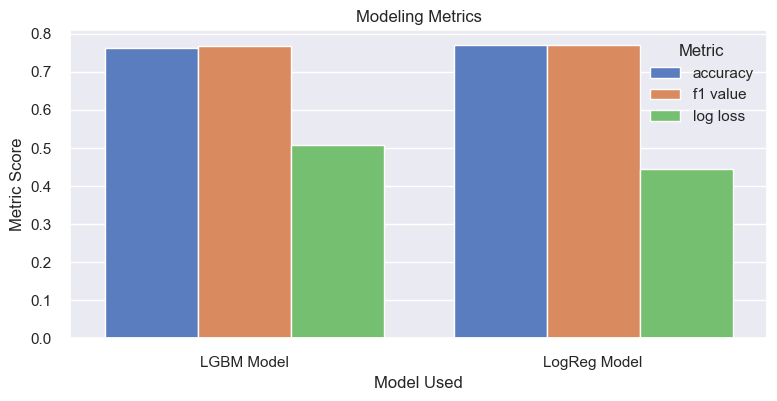

In [141]:
f, ax = plt.subplots(figsize = (9,4))
sns.set_style("whitegrid")
sns.barplot(x = 'index', y = 'value', hue = 'variable', data = score_df,
            palette = 'muted')
plt.xlabel('Model Used')
plt.ylabel('Metric Score')
plt.title('Modeling Metrics')
plt.legend(title = 'Metric')
#ax.set_xticklabels(["Baseline Random Forest", "Tuned Random Forest", "Baseline Light GBM", "Tuned Light GBM"])
plt.show()

## Business Focus & Metrics

The business goals were to predict which recipes will be high traffic and to predict the high traffic recipes with 80% accuracy. Our model was able to get close at predicting whether new (unseen) recipes would drive high traffic with 77% accuracy.

#### Metrics

The product team was very focused on accuracy, and while we believe that accuracy is important we also believe that the probablies are more important. We want to implement the new recipes that have the highest probability of driving high traffic. We can apply the model to all of the recipes in our database and sort those by the most likely to succeed. **Therefore, we recommend monitoring accuracy and log-loss of the new data using our model.**

Looking at just the top 30 highest probabilites in the test data we can see our model predicts with over 95% accuracy and a log-loss that is below 0.15. While we would expect these numbers to worsen over time, these are good baselines to measure our first month of model implementation.

In [164]:
# examining probablies
prob_df = pd.DataFrame(columns = feat_names, data = X_test)
prob_df['probs'] = logit_probs[:,1]
prob_df['actual'] = y_test.values

In [167]:
#showing top 10 probabilities
prob_df.sort_values(by= 'probs', ascending = False).head(10)

,num__calories,num__carbohydrate,num__sugar,num__protein,num__sugar_pct,num__protein_pct,num__sugar_pct_carbs,cat__category_Beverages,cat__category_Breakfast,cat__category_Chicken,cat__category_Dessert,cat__category_Lunch/Snacks,cat__category_Meat,cat__category_One Dish Meal,cat__category_Pork,cat__category_Potato,cat__category_Vegetable,cat__servings_1,cat__servings_2,cat__servings_4,cat__servings_6,probs,actual
69,0.459244,-0.782472,1.819474,-0.307826,-0.069043,-0.045233,2.979736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.987090,1
60,0.307290,0.793870,-0.536198,-0.614846,-0.081464,-0.046048,-0.139572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.986951,1
94,-0.275084,0.185098,-0.539606,-0.571929,-0.081097,-0.045681,-0.139005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.985501,1
47,-0.778653,-0.501080,-0.506207,-0.569728,-0.077427,-0.044222,-0.133023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.983905,1
30,1.363946,-0.650655,0.101115,-0.381830,-0.079618,-0.045731,-0.041445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.979644,1
74,-0.934937,0.130914,-0.576414,-0.570554,-0.071086,-0.033266,-0.139720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.978736,1
26,-0.885596,-0.414113,-0.307174,-0.278114,-0.051775,-0.026968,-0.124166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.977590,1
45,0.016036,-0.429594,0.088846,-0.664090,-0.076514,-0.046196,-0.101558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.977416,1
118,-0.455552,-0.554353,-0.225380,-0.627501,-0.076134,-0.045918,-0.107880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.977145,1
114,-0.737639,-0.059185,0.163142,-0.576881,-0.055870,-0.044704,-0.119071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.977102,1


In [169]:
#log loss 
print(log_loss(prob_df.sort_values(by= 'probs', ascending = False).head(30)['actual'], prob_df.sort_values(by='probs', ascending = False).head(30)['probs'], normalize=True))

0.1426885448219868


In [173]:
print(accuracy_score(prob_df.sort_values(by= 'probs', ascending = False).head(30)['actual'], np.full((30,1), 1)))

0.9666666666666667


## Conclusion and Recommendation

Our model was able to predict whether a new receipe would drive "high-traffic" to our website with 77% accuracy. We can apply the model to all potential receipes and use it to sort them by probability of driving "high-traffic." We can then set the model into production for new receipes and put them order by probability of driving "high-traffic". We can continue to monitor this accuracy metric after deployment to make sure it doesn't drop over time indicating we would want to refresh the model with new data and features. We also recommend monitoring log-loss.

### Recommendations:

While we can put this model into production right away, we have numerous suggestions around the collection of data that would allow us to build a far superior model.

- First, we recommend capturing the actual amount of traffic that went to the website while the receipe was up rather than hitting an arbitrary threshold. This would allow us to solve a different type of problem, but would ultimately allow us to make a better model. In addition, we could change the cut-off threshold for the number of visitors we consider "high-traffic" and "low-traffic" in the future as we become better at predicting high-traffic receipies.

- Next, it was clear that the calorie and nutritional information was not reflective of the actual food which likely hindered the model as these columns were not as useful as they could have been. We recommend collecting the total grams of fat in a serving and then doing validation that the calories per serving is calculated correctly using carbs, protein, and fat.

- Finally, we could always use more data fields for the receipes some which already captured on the website. Date the receipe was put up on the website, preparation time, and the instructions could all be used to create important new features for a model.